# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

In [2]:
import pandas as pd

:::

### Identify the ecoregion for each observation

You can combine the ecoregions and the observations **spatially** using
a method called `.sjoin()`, which stands for spatial join.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Check out the <a
href="https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins"><code>geopandas</code>
documentation on spatial joins</a> to help you figure this one out. You
can also ask your favorite LLM (Large-Language Model, like ChatGPT)</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Perform a spatial join</div></div><div class="callout-body-container callout-body"><p>Identify the correct values for the <code>how=</code> and
<code>predicate=</code> parameters of the spatial join.</p></div></div>

In [3]:
gbif_ecoregion_gdf = (
    gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_gdf,
        how='inner', 
        predicate='contains')

)
gbif_ecoregion_gdf

,name,area,geometry,gbifID,month
ecoregion_id,,,,,
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5637174988,8
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5307929661,6
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5390637549,6
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5422144418,9
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",4863448824,4
...,...,...,...,...,...
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5365433476,5
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5439723760,8
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5345128418,4


### Count the observations in each ecoregion each month

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Group observations by ecoregion</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>columns_to_group_by</code> with a list of columns.
Keep in mind that you will end up with one row for each group – you want
to count the observations in each ecoregion by month.</li>
<li>Select only month/ecosystem combinations that have more than one
occurrence recorded, since a single occurrence could be an error.</li>
<li>Use the <code>.groupby()</code> and <code>.mean()</code> methods to
compute the mean occurrences by ecoregion and by month.</li>
<li>Run the code – it will normalize the number of occurrences by month
and ecoretion.</li>
</ol></div></div>

In [4]:
gbif_ecoregion_gdf

,name,area,geometry,gbifID,month
ecoregion_id,,,,,
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5637174988,8
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5307929661,6
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5390637549,6
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",5422144418,9
5.0,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673...",4863448824,4
...,...,...,...,...,...
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5365433476,5
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5439723760,8
839.0,Northern Rockies conifer forests,35.905513,"POLYGON ((-119.99977 54.53117, -119.8914 54.45...",5345128418,4


In [5]:
occurrence_df = (
    gbif_ecoregion_gdf
    #Reset Index
    .reset_index()
    # For each ecoregion, for each month...
    .groupby(['ecoregion_id','month'])
    # ...count the number of occurrences
    .agg(
        occurrences=('gbifID','count'),
        area=('area','first')
        )
)
 



In [6]:

#Normalize by area
occurrence_df['density'] = occurrence_df.occurrences / occurrence_df.area

 # Get rid of rare observations (possible misidentification?)
occurrence_df = occurrence_df[occurrence_df.occurrences>1]

 # Take the mean by ecoregion
mean_occurrences_by_ecoregion = (
     occurrence_df
     .groupby('ecoregion_id')
     .mean()
 )


# Take the mean by month
mean_occurrences_by_month = (
    occurrence_df
     .groupby('month')
     .mean()
)

mean_occurrences_by_month

,occurrences,area,density
month,,,
1,448.638298,15.119357,38.037026
2,454.913793,14.216801,32.162368
3,599.753846,16.804503,60.206571
4,555.769231,23.825414,46.845269
5,629.734940,29.949734,33.998052
6,297.600000,31.894283,18.048674
7,232.298507,33.637326,12.750469
8,260.138889,34.898287,14.277553
9,298.027397,26.968537,18.735859


### Normalize the observations

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Normalize</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Divide occurrences by the mean occurrences by month AND the mean
occurrences by ecoregion</li>
</ol></div></div>

In [7]:
# Normalize by space and time for sampling effort
occurrence_df['norm_occurrences'] = (
    occurrence_df[['density']]
    / mean_occurrences_by_ecoregion[['density']]
    / mean_occurrences_by_month[['density']]
)
occurrence_df

occurrences       area   density  norm_occurrences
ecoregion_id month                                                    
5.0          4                4   8.196573  0.488009          0.031050
             6                2   8.196573  0.244004          0.040295
             8                3   8.196573  0.366007          0.076407
             9                2   8.196573  0.244004          0.038817
10.0         4                7  28.388010  0.246583          0.022989
...                         ...        ...       ...               ...
839.0        8              208  35.905513  5.792982          0.080935
             9              215  35.905513  5.987938          0.063752
             10              66  35.905513  1.838158          0.017457
             11              26  35.905513  0.724123          0.005095
             12              14  35.905513  0.389912          0.002231

[802 rows x 4 columns]

In [8]:
# force numeric and kill bad values
occurrence_df['norm_occurrences'] = pd.to_numeric(
    occurrence_df['norm_occurrences'],
    errors='coerce'
)

# replace +/-inf with NA
occurrence_df['norm_occurrences'].replace(
    [float('inf'), float('-inf')],
    pd.NA,
    inplace=True
)

# drop rows where norm_occurrences is NA or not finite
occurrence_df = occurrence_df.dropna(
    subset=['norm_occurrences']
).copy()

print(occurrence_df)

                    occurrences       area   density  norm_occurrences
ecoregion_id month                                                    
5.0          4                4   8.196573  0.488009          0.031050
             6                2   8.196573  0.244004          0.040295
             8                3   8.196573  0.366007          0.076407
             9                2   8.196573  0.244004          0.038817
10.0         4                7  28.388010  0.246583          0.022989
...                         ...        ...       ...               ...
839.0        8              208  35.905513  5.792982          0.080935
             9              215  35.905513  5.987938          0.063752
             10              66  35.905513  1.838158          0.017457
             11              26  35.905513  0.724123          0.005095
             12              14  35.905513  0.389912          0.002231

[802 rows x 4 columns]


/var/folders/5c/rc9sblr11n575rm6khzlpqkw0000gp/T/ipykernel_77850/2850468869.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  occurrence_df['norm_occurrences'].replace(


In [9]:

occurrence_df = occurrence_df.reset_index()
# Now we truly have columns:
#   'ecoregion_id', 'month', 'occurrences', 'area', 'density',
#   'mean_ecoregion_density', 'mean_month_density',
#   'norm_occurrences'

########################################
# 7. Clean the 'month' column now that it's a column
########################################

occurrence_df['month'] = pd.to_numeric(
    occurrence_df['month'],
    errors='coerce'
)

occurrence_df = occurrence_df.dropna(subset=['month'])
occurrence_df['month'] = occurrence_df['month'].astype(int)
occurrence_df = occurrence_df[occurrence_df['month'].between(1, 12)]

########################################
# 8. Final safety clean of norm_occurrences
########################################

occurrence_df['norm_occurrences'] = pd.to_numeric(
    occurrence_df['norm_occurrences'],
    errors='coerce'
)
occurrence_df['norm_occurrences'].replace(
    [float('inf'), float('-inf')],
    pd.NA,
    inplace=True
)
occurrence_df = occurrence_df.dropna(
    subset=['norm_occurrences']
).copy()

########################################
# 9. Join into polygons to get occurrence_gdf for plotting
########################################
# Assumptions:
#   - gdf has one row per ecoregion polygon
#   - gdf has a column 'ecoregion_id' that matches occurrence_df['ecoregion_id']
# If your polygon ID column in gdf is named differently, rename it first.

# gdf = gdf.rename(columns={'YOUR_POLY_ID_COL': 'ecoregion_id'})

occurrence_gdf = (
    gdf.merge(
        occurrence_df[['ecoregion_id', 'month', 'norm_occurrences']],
        on='ecoregion_id',
        how='inner'  # or 'left' if you want polygons even with no data
    )
    .to_crs("EPSG:4326")
)

# Final cleanup before plotting
occurrence_gdf['month'] = pd.to_numeric(occurrence_gdf['month'], errors='coerce')
occurrence_gdf['norm_occurrences'] = pd.to_numeric(
    occurrence_gdf['norm_occurrences'], errors='coerce'
)

occurrence_gdf = occurrence_gdf.dropna(
    subset=['month', 'norm_occurrences']
).copy()

occurrence_gdf['month'] = occurrence_gdf['month'].astype(int)
occurrence_gdf = occurrence_gdf[occurrence_gdf['month'].between(1, 12)]

# At this point:
#   occurrence_gdf has columns:
#       geometry (polygons),
#       month (int 1..12),
#       norm_occurrences (finite float)
#   and is safe to feed to hvplot(groupby='month', c='norm_occurrences')


/var/folders/5c/rc9sblr11n575rm6khzlpqkw0000gp/T/ipykernel_77850/1557035739.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  occurrence_df['norm_occurrences'].replace(


In [12]:
print(occurrence_df)

     ecoregion_id  month  occurrences       area   density  norm_occurrences
0             5.0      4            4   8.196573  0.488009          0.031050
1             5.0      6            2   8.196573  0.244004          0.040295
2             5.0      8            3   8.196573  0.366007          0.076407
3             5.0      9            2   8.196573  0.244004          0.038817
4            10.0      4            7  28.388010  0.246583          0.022989
..            ...    ...          ...        ...       ...               ...
797         839.0      8          208  35.905513  5.792982          0.080935
798         839.0      9          215  35.905513  5.987938          0.063752
799         839.0     10           66  35.905513  1.838158          0.017457
800         839.0     11           26  35.905513  0.724123          0.005095
801         839.0     12           14  35.905513  0.389912          0.002231

[802 rows x 6 columns]


<Axes: xlabel='month', ylabel='norm_occurrences'>

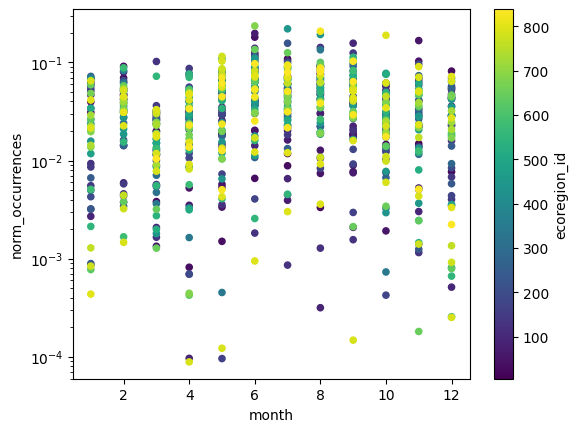

In [10]:
occurrence_df.reset_index().plot.scatter(
    x='month', y='norm_occurrences', c='ecoregion_id',
    logy=True
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="f13606e9" class="cell" data-execution_count="9">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store occurrence_df</span></code></pre></div>
</div></div></div>

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [11]:
%store occurrence_df gbif_gdf

Stored 'occurrence_df' (DataFrame)
Stored 'gbif_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!